In [22]:
import pandas as pd

dataset = "./Computed insight - Success of active sellers.csv"

# CSVファイルを読み込む
df = pd.read_csv(dataset)

# データを表示する
df.head()

,index,merchantid,listedproducts,totalunitssold,meanunitssoldperproduct,rating,merchantratingscount,meanproductprices,meanretailprices,averagediscount,meandiscount,meanproductratingscount,totalurgencycount,urgencytextrate
0,0,5357bcf2bb72c5504882e889,2,120000,60000.0,4.219,320031.0,9.00,20.0,54.0,54.0,8836.0,1.0,50.0
1,1,5708773c3c02161b3f8c7900,5,107100,21420.0,3.934,139223.0,7.76,34.2,61.0,61.0,4010.0,3.0,60.0
2,2,5417aada4ad3ab27e954b76c,2,100007,50004.0,4.053,108048.0,8.00,8.0,-1.0,-1.0,5531.0,NaN,NaN
3,3,570f3a713a698c14278bb51e,1,100000,100000.0,3.889,19248.0,5.67,19.0,71.0,71.0,18393.0,1.0,100.0
4,4,53082ea15aefb07dfe1f2a4f,1,100000,100000.0,4.036,366898.0,5.00,33.0,85.0,85.0,13789.0,NaN,NaN


In [23]:
print(df.shape)

df.isna().sum()

(958, 14)


index                        0
merchantid                   0
listedproducts               0
totalunitssold               0
meanunitssoldperproduct      0
rating                       0
merchantratingscount         0
meanproductprices            0
meanretailprices             0
averagediscount              0
meandiscount                 0
meanproductratingscount      0
totalurgencycount          567
urgencytextrate            567
dtype: int64

In [24]:
# 欠損値が多い特徴量を削除
df = df.dropna(thresh=int(df.shape[0] * 0.9), axis=1)
df.columns


Index(['index', 'merchantid', 'listedproducts', 'totalunitssold',
       'meanunitssoldperproduct', 'rating', 'merchantratingscount',
       'meanproductprices', 'meanretailprices', 'averagediscount',
       'meandiscount', 'meanproductratingscount'],
      dtype='object')

In [25]:
df.describe()

,index,listedproducts,totalunitssold,meanunitssoldperproduct,rating,merchantratingscount,meanproductprices,meanretailprices,averagediscount,meandiscount,meanproductratingscount
count,958.000000,958.000000,958.000000,958.000000,958.000000,9.580000e+02,958.000000,958.000000,958.000000,958.000000,958.000000
mean,478.500000,1.641962,7124.483299,4407.605428,4.043994,2.202045e+04,8.634906,24.802265,28.721294,28.698017,922.538622
std,276.695079,1.246183,14363.521893,9167.077812,0.222137,8.473232e+04,3.987599,30.258719,39.918708,39.914269,1925.750178
min,0.000000,1.000000,1.000000,1.000000,2.333000,0.000000e+00,1.000000,1.000000,-18.000000,-18.000000,0.000000
25%,239.250000,1.000000,100.000000,100.000000,3.931000,1.373000e+03,6.000000,7.000000,-10.000000,-10.000000,31.000000
50%,478.500000,1.000000,1000.000000,1000.000000,4.055500,5.990500e+03,8.000000,11.000000,16.000000,16.000000,210.500000
75%,717.750000,2.000000,10000.000000,5000.000000,4.190000,1.723850e+04,11.000000,28.875000,71.000000,71.000000,920.750000
max,957.000000,15.000000,120000.000000,100000.000000,5.000000,2.174765e+06,49.000000,252.000000,97.000000,97.000000,20744.000000


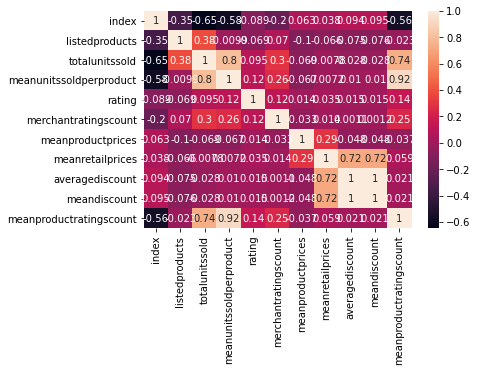

In [26]:
import seaborn as sns

# 相関係数行列を作成
corr = df.corr()

# ヒートマップで可視化
sns.heatmap(corr,annot=True)


In [31]:
from sklearn.model_selection import train_test_split

# 特徴量(X)とターゲット(y)を指定
X = df[['listedproducts', 'meanunitssoldperproduct', 'rating', 'merchantratingscount',
       'meanproductprices', 'meanretailprices', 'averagediscount',
       'meandiscount', 'meanproductratingscount']]

# ターゲット(target)として使用するカラムを指定
y = df['totalunitssold']

# 学習用データとテスト用データに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [32]:
from sklearn.linear_model import LinearRegression

# 線形回帰のインスタンスを生成
model = LinearRegression()

# 線形回帰モデルを学習
model.fit(X_train, y_train)

# テストデータで評価
score = model.score(X_test, y_test)
print("Test score: {:.2f}".format(score))


Test score: 0.78
